# 4D WCM analysis

This script is based on the data analysis scripts from the 4DWCM paper. We will demonstrate several interesting results here.

In [1]:
import jLM
from jLM.RDME import File as RDMEFile
import numpy as np
import pandas as pd
import os
import pickle

from analysis_scripts import WCM_analysis
from analysis_scripts.auxillery import round_sig, getAvgRxnTraceCounts
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

then we load the data

In [2]:
def setup_analysis_parameters():
    """
    Set up basic parameters for the WCM analysis
    
    Returns:
    - config: dictionary containing analysis configuration
    """
    config = {
        'input_dir': './data/',
        'input_label': 'counts_and_fluxes',
        'min_replicate': 1,
        'max_replicate': 20,  # Note: Back to original value
        'merging_required': True,
        'pickle_label': 'ensemble_test',
        'figure_dir': './results/',
        'sim_properties_file': './analysis_scripts/sim_properties_1_9.pkl'
    }
    return config

def setup_output_directory(figure_dir):
    """
    Create output directory if it doesn't exist
    
    Parameters:
    - figure_dir: path to the figure output directory
    """
    if not os.path.isdir(figure_dir):
        os.mkdir(figure_dir)
        print(f"Created output directory: {figure_dir}")
    else:
        print(f"Using existing output directory: {figure_dir}")

def initialize_wcm_ensemble(config):
    """
    Initialize and load WCM ensemble data
    
    Parameters:
    - config: configuration dictionary
    
    Returns:
    - w: WCM_ensemble object with loaded data
    - t: time array
    - reps: array of replicate numbers
    """
    print("=== Initializing WCM Ensemble ===")
    
    # Create replicate array
    reps = np.arange(config['min_replicate'], config['max_replicate'] + 1, dtype=np.int32)
    print(f"Processing replicates: {config['min_replicate']} to {config['max_replicate']} ({len(reps)} total)")
    
    # Initialize WCM ensemble
    w = WCM_analysis.WCM_ensemble()
    
    # Set trajectory files
    print("Setting trajectory files...")
    w.set_traj_files(config['input_dir'], config['input_label'], reps)
    
    # Load trajectories
    print("Loading trajectories...")
    w.load_trajs()
    
    # Merge trajectories if required
    if config['merging_required']:
        print("Merging trajectories...")
        w.merge_trajs()
    
    # Get time array
    t = w.get_t()
    print(f"Time array loaded: {len(t)} time points")
    
    return w, t, reps

def load_species_list(config):
    """
    Load species list from CSV file
    
    Parameters:
    - config: configuration dictionary
    
    Returns:
    - species_list: array of species names
    - traj: trajectory DataFrame
    """
    print("=== Loading Species Information ===")
    
    # Load CSV file
    csv_file = config['input_dir'] + config['input_label'] + '.1.csv'
    print(f"Reading species data from: {csv_file}")
    
    traj = pd.read_csv(csv_file, index_col=False)
    traj = traj.reset_index(drop=True)
    
    # Extract species list from the 'Time' column (which contains species names)
    # NOTE: The CSV structure has species names in the first column called 'Time'
    species_list = traj['Time'].values
    print(f"Found {len(species_list)} species")
    
    return species_list, traj

def load_simulation_properties(config):
    """
    Load simulation properties including genome information
    
    Parameters:
    - config: configuration dictionary
    
    Returns:
    - genome: genome dictionary containing gene information
    - sim_properties: full simulation properties dictionary
    """
    print("=== Loading Simulation Properties ===")
    
    print(f"Loading properties from: {config['sim_properties_file']}")
    with open(config['sim_properties_file'], 'rb') as handle:
        sim_properties = pickle.load(handle)
    
    genome = sim_properties['genome']
    print(f"Genome loaded with {len(genome)} entries")
    
    return genome, sim_properties

def summarize_data_loading(w, t, reps, species_list, genome):
    """
    Print summary of loaded data
    
    Parameters:
    - w: WCM ensemble object
    - t: time array
    - reps: replicate array
    - species_list: list of species
    - genome: genome dictionary
    """
    print("\\n=== Data Loading Summary ===")
    print(f"Number of replicates: {len(reps)}")
    print(f"Time points per trajectory: {len(t)}")
    print(f"Total species: {len(species_list)}")
    print(f"Genome entries: {len(genome)}")
    print(f"Time range: {t[0]:.1f} to {t[-1]:.1f} seconds")
    print(f"Sample species: {species_list[:5]}...")

# === Main Data Loading Workflow ===
print("Starting 4D WCM data analysis...")

# Setup analysis parameters
config = setup_analysis_parameters()

# Setup output directory
setup_output_directory(config['figure_dir'])

# Initialize WCM ensemble and load data
w, t, reps = initialize_wcm_ensemble(config)

# Load species information
specList, traj = load_species_list(config)

# Load simulation properties and genome
genome, sim_properties = load_simulation_properties(config)

# Print summary
summarize_data_loading(w, t, reps, specList, genome)

# Store results in original variable names for compatibility
in_dir = config['input_dir']
in_label = config['input_label']
min_rep = config['min_replicate']
max_rep = config['max_replicate']
merging_required = config['merging_required']
pkl_label = config['pickle_label']
figDir = config['figure_dir']
totalTime = len(t)

print(f"\\n=== Setup Complete ===")
print(f"Ready for analysis with {len(reps)} replicates and {totalTime} time points")

Starting 4D WCM data analysis...
Using existing output directory: ./results/
=== Initializing WCM Ensemble ===
Processing replicates: 1 to 20 (20 total)
Setting trajectory files...
Loading trajectories...
Species Array:
(8397, 7201)
Species Array:
(8397, 7201)
Species Array:
(8397, 7201)
Species Array:
(8397, 7201)
Species Array:
(8397, 7201)
Species Array:
(8397, 7201)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)Species Array:

(8397, 7201)
Flux Array:
(175, 7201)
Flux Array:
(175, 7201)
Flux Array:
(175, 7201)
Flux Array:
(175, 7201)
Flux Array:
(175, 7201)
Flux Array:
(175, 7201)
Flux Array:
(175, 7201)
Loaded trajectory 1/20 (5.0%)
Loaded trajectory 2/20 (10.0%)
Loaded trajectory 3/20 (15.0%)
Loaded trajectory 4/20 (20.0%)
Loaded trajectory 5/20 (25.0%)
Loaded trajectory 6/20 (30.0%)
Loaded trajectory 7/20 (35.0%)
Loaded trajectory 8/20 (40.0%)
Species Array:
(8397, 7201)
Flux Array:
(175, 7201)
Species Array:
(8397, 7201)
Loaded trajectory 9/20 (45.0%)
Flux Array:
(175, 720

## 1. Surface Area, volume and DNA doubling

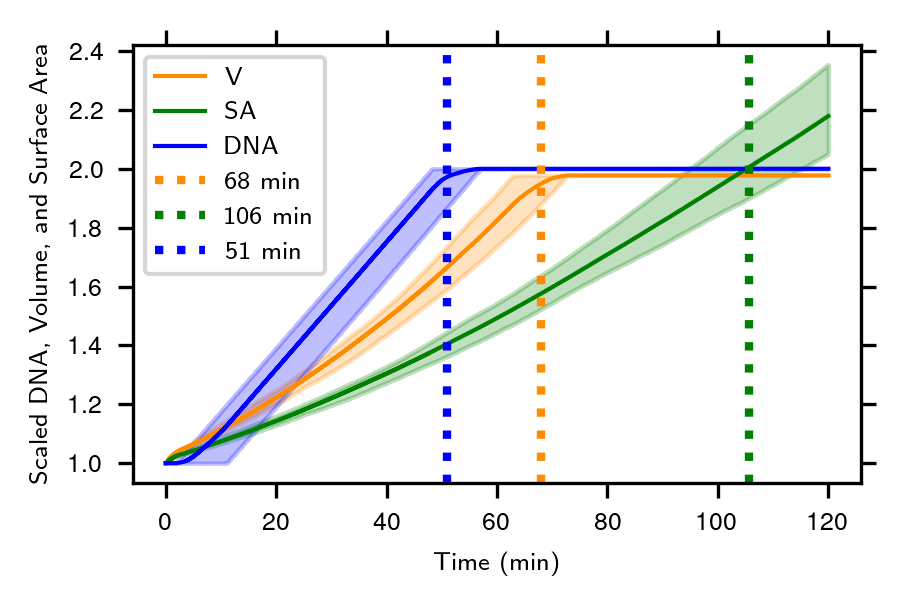

In [3]:
def plot_species_trace_with_percentiles(ax, time_minutes, data, color, label, alpha=0.25):
    """Plot mean trace with percentile bands for a species"""
    # Normalize data by initial values
    normalized_data = data / data[:, 0][:, np.newaxis]
    
    # Plot mean line
    ax.plot(time_minutes, np.average(normalized_data, axis=0), 
            color=color, lw=1, label=label)
    
    # Add percentile bands (1st to 99th percentile)
    ax.fill_between(time_minutes, 
                    np.percentile(normalized_data, 1, axis=0),
                    np.percentile(normalized_data, 99, axis=0), 
                    color=color, alpha=alpha)
    
    return normalized_data

def calculate_doubling_times(data, threshold, time_conversion=60):
    """Calculate doubling times for each replicate when data reaches threshold"""
    doubling_times = []
    
    for rep_idx in range(data.shape[0]):
        # Normalize by initial value
        trace_normalized = data[rep_idx] / data[rep_idx, 0]
        
        # Find first timepoint where threshold is exceeded
        exceed_indices = np.argwhere(trace_normalized >= threshold)
        if len(exceed_indices) > 0:
            dt_timepoint = min(exceed_indices) / time_conversion
            doubling_times.append(dt_timepoint)
    
    return np.array(doubling_times)

def add_doubling_time_markers(ax, doubling_times, color, sig_figs=2):
    """Add vertical line markers for average doubling times"""
    avg_dt = np.average(doubling_times)
    ax.axvline(avg_dt, lw=2, linestyle=':', color=color, 
               label=f'{int(round_sig(avg_dt, sig_figs))} min')
    return avg_dt

# === Setup Plot ===
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 2))
ax = plt.gca()

# Convert time to minutes
time_minutes = t / 60

# === Volume Analysis ===
volume_species = ['Volume']
volume_traces = w.get_species_traces(volume_species)
volume_data = volume_traces[0].T

# Plot volume with percentiles
volume_normalized = plot_species_trace_with_percentiles(
    ax, time_minutes, volume_data, 'darkorange', 'V')

# === Surface Area Analysis ===
surface_area_species = ['SA_total']
surface_area_traces = w.get_species_traces(surface_area_species) / 1e5
surface_area_data = surface_area_traces[0].T

# Plot surface area with percentiles
sa_normalized = plot_species_trace_with_percentiles(
    ax, time_minutes, surface_area_data, 'green', 'SA')

# === DNA/Chromosome Analysis ===
chromosome_species = ['chromosome']
chromosome_traces = w.get_species_traces(chromosome_species)
chromosome_data = chromosome_traces[0].T

# Plot chromosome with percentiles
chr_normalized = plot_species_trace_with_percentiles(
    ax, time_minutes, chromosome_data, 'blue', 'DNA')

# === Calculate and Display Doubling Times ===
# Calculate doubling times for each species
volume_dt_array = calculate_doubling_times(volume_data, threshold=1.975)
sa_dt_array = calculate_doubling_times(surface_area_data, threshold=2.0)
chr_dt_array = calculate_doubling_times(chromosome_data, threshold=1.99)

# Store in original variable names for compatibility
volDT = volume_dt_array.tolist()
saDT = sa_dt_array.tolist()
chrDT = chr_dt_array.tolist()

# Add doubling time markers to plot
v_dt = add_doubling_time_markers(ax, volume_dt_array, 'darkorange', sig_figs=2)
sa_dt = add_doubling_time_markers(ax, sa_dt_array, 'green', sig_figs=3)
chro_dt = add_doubling_time_markers(ax, chr_dt_array, 'blue', sig_figs=2)

# === Format Plot ===
ax.set_ylabel('Scaled DNA, Volume, and Surface Area')
ax.set_xlabel('Time (min)')
ax.tick_params(top=True, bottom=True, left=True, right=True)
ax.legend(loc='upper left')

plt.tight_layout()
plt.savefig(f'{figDir}DNA_V_SA.png')

## 2. Complex assembly and active counts

In [4]:
def calculate_complex_totals_and_active_fractions(w, specList, t, complex_name, 
                                                 active_prefix, inactive_species, 
                                                 multi_count_species=None):
    """
    Calculate total complex counts and active fractions for ribosomes, degradosomes, or RNAP
    
    Parameters:
    - w: WCM_ensemble object
    - specList: list of all species names
    - t: time array
    - complex_name: name of the complex (e.g., 'ribosomeP', 'Degradosome', 'RNAP')
    - active_prefix: prefix for active species (e.g., 'RB_', 'D_', 'RP_')
    - inactive_species: list of inactive species names
    - multi_count_species: dict mapping species to their multiplicity (for RNAP)
    
    Returns:
    - total_avg: average total counts over time
    - active_fraction: fraction of active complexes over time
    - totals_by_replicate: total counts for each replicate
    """
    
    # === Calculate Average Active Counts ===
    active_avg = np.zeros(len(t))
    
    for specID in specList:
        if specID.startswith(active_prefix):
            # Handle special cases with multiplicity for RNAP
            if multi_count_species and any(key in specID for key in multi_count_species.keys()):
                # More robust parsing for RNAP species
                if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
                    parts = specID.split('_')
                    try:
                        count = int(parts[-2])
                        stateTrace = w.get_avg_species_traces([specID])
                        stateTrace = stateTrace * count
                    except (ValueError, IndexError):
                        # If parsing fails, treat as single count
                        stateTrace = w.get_avg_species_traces([specID])
                else:
                    stateTrace = w.get_avg_species_traces([specID])
            else:
                stateTrace = w.get_avg_species_traces([specID])
            
            active_avg = np.add(active_avg, stateTrace)
    
    # === Calculate Average Total Counts ===
    total_avg = w.get_avg_species_traces(inactive_species)
    
    # Add active species to total
    for specID in specList:
        if specID.startswith(active_prefix):
            if multi_count_species and any(key in specID for key in multi_count_species.keys()):
                if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
                    parts = specID.split('_')
                    try:
                        count = int(parts[-2])
                        stateTrace = w.get_avg_species_traces([specID])
                        stateTrace = stateTrace * count
                    except (ValueError, IndexError):
                        stateTrace = w.get_avg_species_traces([specID])
                else:
                    stateTrace = w.get_avg_species_traces([specID])
            else:
                stateTrace = w.get_avg_species_traces([specID])
            
            total_avg = np.add(total_avg, stateTrace)
    
    # === Calculate Active Fraction ===
    active_fraction = np.divide(active_avg[0], total_avg[0])
    
    # === Calculate Totals by Replicate ===
    totals_by_replicate = w.get_species_traces(inactive_species)
    
    for specID in specList:
        if specID.startswith(active_prefix):
            if multi_count_species and any(key in specID for key in multi_count_species.keys()):
                if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
                    parts = specID.split('_')
                    try:
                        count = int(parts[-2])
                        stateTrace = w.get_species_traces([specID])
                        stateTrace = stateTrace * count
                    except (ValueError, IndexError):
                        stateTrace = w.get_species_traces([specID])
                else:
                    stateTrace = w.get_species_traces([specID])
            else:
                stateTrace = w.get_species_traces([specID])
            
            totals_by_replicate = np.add(totals_by_replicate, stateTrace)
    
    totals_by_replicate = totals_by_replicate[0].T
    
    return total_avg[0], active_fraction, totals_by_replicate

def calculate_ribosome_subunit_totals(w, specList):
    """Calculate small and large ribosomal subunit totals"""
    # Initialize with rRNA species
    ssu_totals = w.get_species_traces(['R_0069']) + w.get_species_traces(['R_0534'])
    lsu_totals = w.get_species_traces(['R_0068']) + w.get_species_traces(['R_0533'])
    
    # Add ribosomal protein species
    for specID in specList:
        if specID.startswith('Rs'):
            print(specID)
            stateTrace = w.get_species_traces([specID])
            ssu_totals = np.add(ssu_totals, stateTrace)
            
        if specID.startswith('RL') or specID.startswith('R5'):
            print(specID)
            stateTrace = w.get_species_traces([specID])
            lsu_totals = np.add(lsu_totals, stateTrace)
    
    return ssu_totals[0].T, lsu_totals[0].T

# === Ribosome Analysis ===
print("=== Analyzing Ribosomes ===")
# Calculate ribosome totals and active fractions using original logic
ribo_avg = np.zeros(len(t))

for specID in specList:
    if specID.startswith('RB_'):
        riboSpec = [specID]
        stateTrace = w.get_avg_species_traces(riboSpec)
        ribo_avg = np.add(ribo_avg, stateTrace)

riboSpec = ['ribosomeP']
ribo_avg_tot = w.get_avg_species_traces(riboSpec)

for specID in specList:
    if specID.startswith('RB_'):
        riboSpec = [specID]
        stateTrace = w.get_avg_species_traces(riboSpec)
        ribo_avg_tot = np.add(ribo_avg_tot, stateTrace)

ribo_tot_dat = ribo_avg_tot[0]
ribo_act_dat = np.divide(ribo_avg[0], ribo_avg_tot[0])

# Calculate ribosome totals by replicate
riboSpec = ['ribosomeP']
ribo_avg = w.get_species_traces(riboSpec)

for specID in specList:
    if specID.startswith('RB_'):
        riboSpec = [specID]
        stateTrace = w.get_species_traces(riboSpec)
        ribo_avg = np.add(ribo_avg, stateTrace)

ribosome_totals = ribo_avg[0].T

# === Degradosome Analysis ===
print("=== Analyzing Degradosomes ===")
# Calculate degradosome totals and active fractions using original logic
avg = np.zeros(len(t))

for specID in specList:
    if specID.startswith('D_'):
        Spec = [specID]
        stateTrace = w.get_avg_species_traces(Spec)
        avg = np.add(avg, stateTrace)

Spec = ['Degradosome']
avg_tot = w.get_avg_species_traces(Spec)

for specID in specList:
    if specID.startswith('D_'):
        Spec = [specID]
        stateTrace = w.get_avg_species_traces(Spec)
        avg_tot = np.add(avg_tot, stateTrace)

deg_tot_dat = avg_tot[0]
deg_act_dat = np.divide(avg[0], avg_tot[0])

# Calculate degradosome totals by replicate
avg = np.zeros(len(t))

for specID in specList:
    if specID.startswith('D_'):
        Spec = [specID]
        stateTrace = w.get_avg_species_traces(Spec)
        avg = np.add(avg, stateTrace)

Spec = ['Degradosome']
avg_tot = w.get_species_traces(Spec)

for specID in specList:
    if specID.startswith('D_'):
        Spec = [specID]
        stateTrace = w.get_species_traces(Spec)
        avg_tot = np.add(avg_tot, stateTrace)

degradosome_totals = avg_tot[0].T

# === RNAP Analysis ===
print("=== Analyzing RNAP ===")
# Use original RNAP calculation logic to avoid errors
ribo_avg = np.zeros(len(t))

for specID in specList:
    if specID.startswith('RP_') and ('_c' not in specID):
        if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
            multiRNAPcheck = specID.split('_')
            RNAP_count = int(multiRNAPcheck[-2])
            riboSpec = [specID]
            stateTrace = w.get_avg_species_traces(riboSpec)
            stateTrace = stateTrace * RNAP_count
        else:
            riboSpec = [specID]
            
            stateTrace = w.get_avg_species_traces(riboSpec)
        
        ribo_avg = np.add(ribo_avg, stateTrace)

riboSpec = ['RNAP']
ribo_avg_tot = w.get_avg_species_traces(riboSpec)

for specID in specList:
    if specID.startswith('RP_') and ('_c' not in specID):
        if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
            multiRNAPcheck = specID.split('_')
            RNAP_count = int(multiRNAPcheck[-2])
            riboSpec = [specID]
            stateTrace = w.get_avg_species_traces(riboSpec)
            stateTrace = stateTrace * RNAP_count
        else:
            riboSpec = [specID]
            stateTrace = w.get_avg_species_traces(riboSpec)
        
        ribo_avg_tot = np.add(ribo_avg_tot, stateTrace)

rnap_tot_dat = ribo_avg_tot[0]
rnap_act_dat = np.divide(ribo_avg[0], ribo_avg_tot[0])

# Calculate RNAP totals by replicate
riboSpec = ['RNAP']
ribo_avg_tot = w.get_species_traces(riboSpec)

for specID in specList:
    if specID.startswith('RP_') and ('_c' not in specID):
        if ('0068' in specID) or ('0069' in specID) or ('0533' in specID) or ('0534' in specID):
            multiRNAPcheck = specID.split('_')
            RNAP_count = int(multiRNAPcheck[-2])
            riboSpec = [specID]
            stateTrace = w.get_species_traces(riboSpec)
            stateTrace = stateTrace * RNAP_count
        else:
            riboSpec = [specID]
            stateTrace = w.get_species_traces(riboSpec)
        
        ribo_avg_tot = np.add(ribo_avg_tot, stateTrace)

rnap_totals = ribo_avg_tot[0].T

# === Ribosome Subunit Analysis ===
print("=== Analyzing Ribosome Subunits ===")
ssu_states, lsu_states = calculate_ribosome_subunit_totals(w, specList)

=== Analyzing Ribosomes ===
=== Analyzing Degradosomes ===


/home/tianyu/miniconda3/envs/ylm2.5/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


=== Analyzing RNAP ===
=== Analyzing Ribosome Subunits ===
Rs4s6s15
Rs4s15
Rs4s6s15s17
Rs4s6s8s15s17
Rs4s6s8s15s17s20
Rs4s6s8s15s16s17s20
Rs4s5s6s8s15s16s17s20
Rs4s6s8s11s15s16s17s20
Rs4s5s6s8s11s15s16s17s20
Rs4s5s6s7s8s11s15s16s17s20
Rs4s5s6s7s8s9s11s15s16s17s20
Rs4s5s6s7s8s9s11s13s15s16s17s20
Rs3s4s5s6s7s8s9s10s11s13s14s15s16s17s19s20
Rs3s4s5s6s7s8s9s10s11s13s15s16s17s19s20
Rs4s5s6s7s8s9s10s11s13s15s16s17s20
Rs3s4s5s6s7s8s9s10s11s13s15s16s17s20
Rs3s4s5s6s7s8s9s10s11s12s13s14s15s16s17s19s20
Rs4
RL24
RL20L24
RL20L21L24
RL20L21L22L24
RL17L20L21L22L24
RL17L20L21L22L23L24
RL1L17L20L21L22L23L24
RL1L3L17L20L21L22L23L24
RL1L3L13L17L20L21L22L23L24
RL1L3L4L13L17L20L21L22L23L24
RL1L3L4L13L15L17L20L21L22L23L24
RL1L3L4L13L15L17L18L20L21L22L23L24
RL1L3L4L13L15L17L18L20L21L22L23L24L29
RL1L3L4L5L13L15L17L18L20L21L22L23L24L29
RL1L3L4L5L13L15L17L18L20L21L22L23L24L29L34
RL1L2L3L4L5L13L15L17L18L20L21L22L23L24L29L34
R5SL1L2L3L4L5L13L15L17L18L20L21L22L23L24L29L34
R5SL1L2L3L4L5L13L15L17L18L20L21L22L23L24L2

/home/tianyu/miniconda3/envs/ylm2.5/lib/python3.7/site-packages/ipykernel_launcher.py:232: RuntimeWarning: invalid value encountered in true_divide


plotting


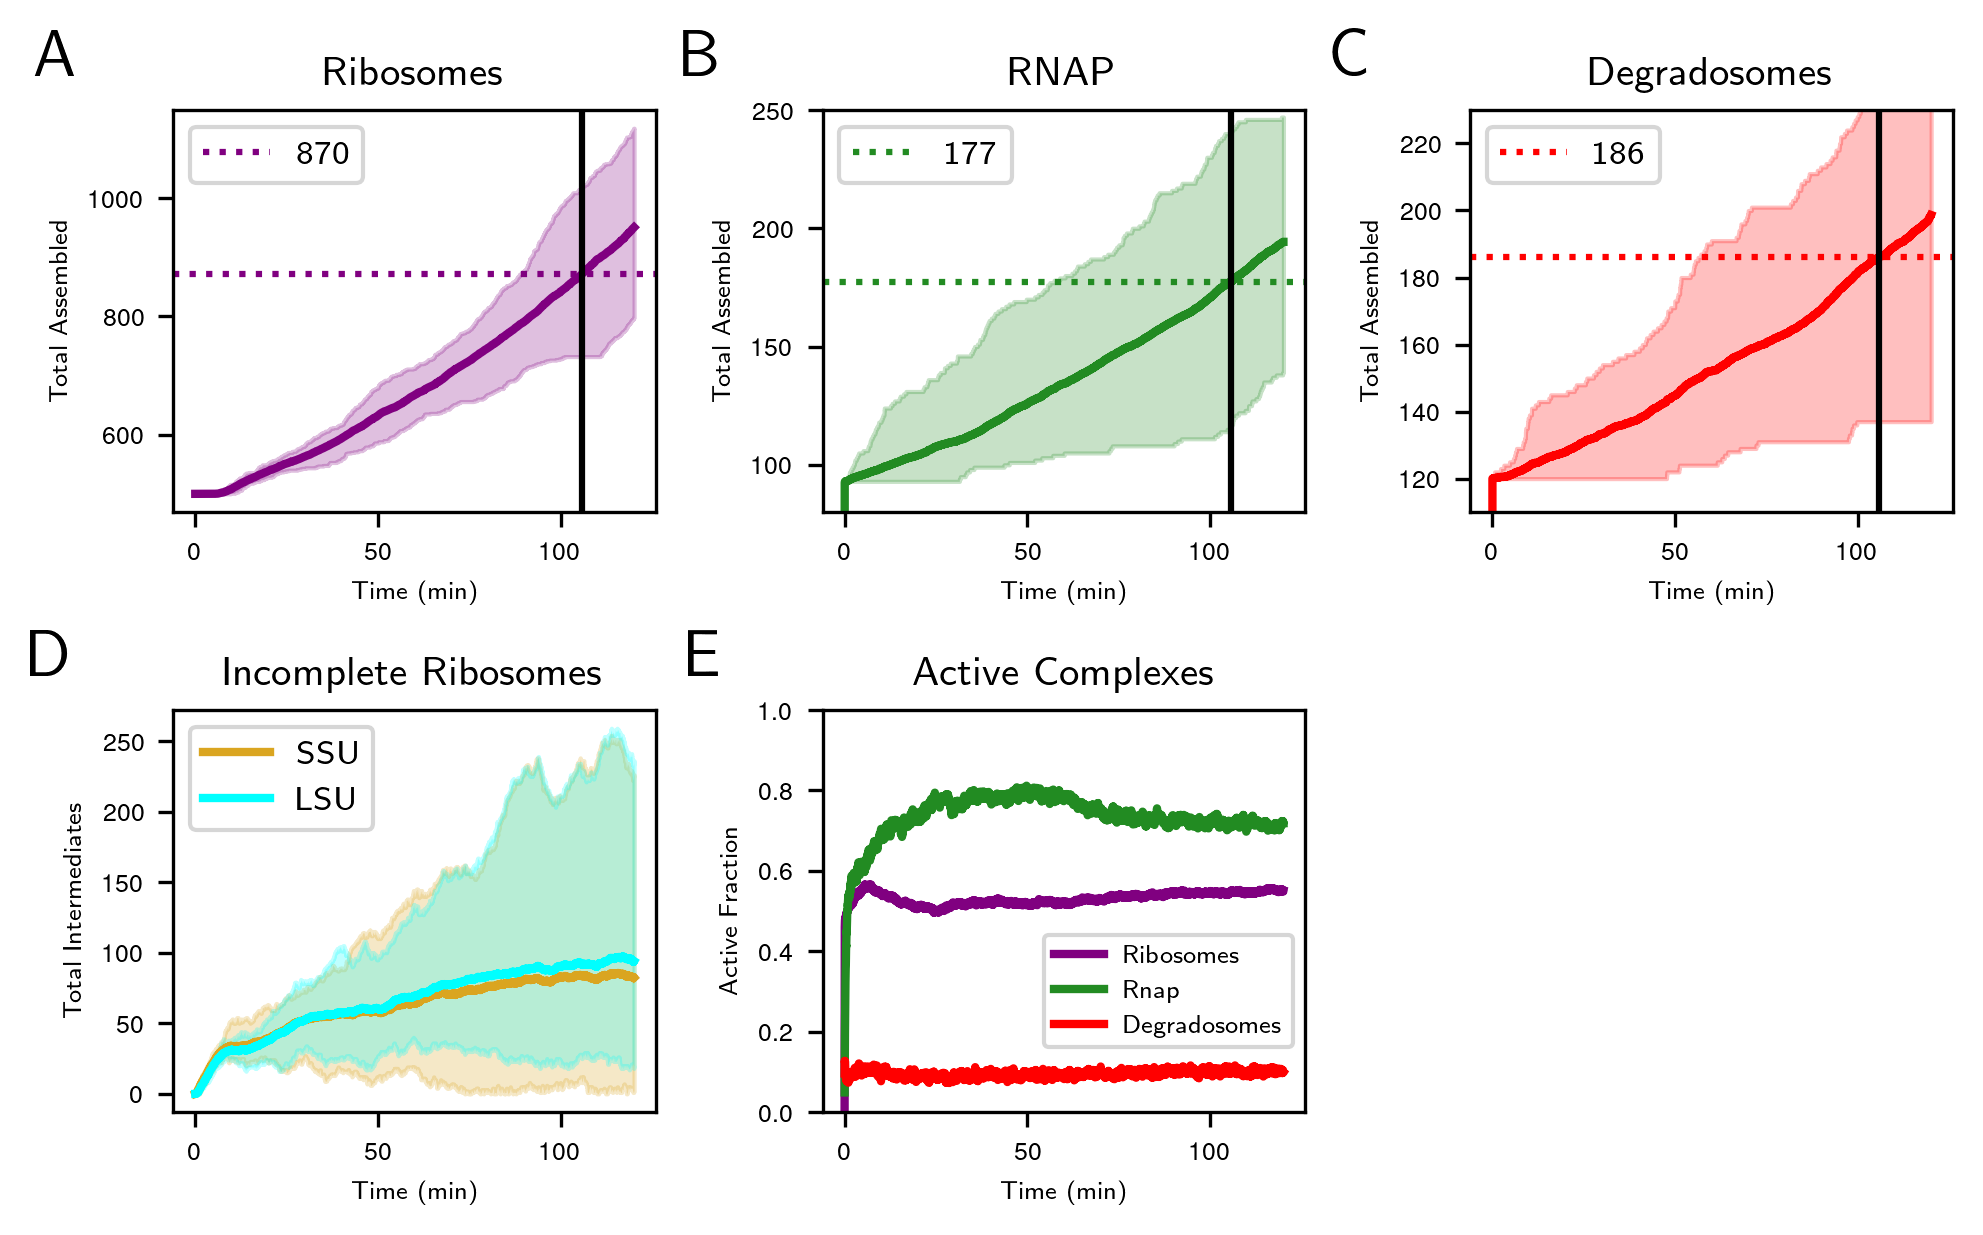

In [5]:
def setup_subplot_formatting():
    """Set up consistent formatting for all subplots"""
    plt.rcParams.update({'font.size': 8})
    plt.rcParams['figure.dpi'] = 300
    
    # Define consistent colors
    colors = {
        'ribosome': 'purple',
        'rnap': 'forestgreen', 
        'degradosome': 'red',
        'ssu': 'goldenrod',
        'lsu': 'cyan'
    }
    return colors

def plot_complex_totals(ax, time_minutes, totals_data, color, title, ylabel="Total Assembled", 
                       ylim=None, division_time=None):
    """Plot total complex counts with percentile bands and doubling time marker"""
    # Plot mean and percentile bands
    ax.plot(time_minutes, np.average(totals_data, axis=0), color=color, lw=2)
    ax.fill_between(time_minutes, 
                    np.percentile(totals_data, 0, axis=0),
                    np.percentile(totals_data, 100, axis=0), 
                    color=color, alpha=0.25)
    
    # Set axis properties
    ax.set_xlabel('Time (min)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    if ylim:
        ax.set_ylim(ylim)
    
    # Add division time marker and value
    if division_time:
        ax.axvline(division_time, color='k')
        value_at_division = np.average(totals_data, axis=0)[int(division_time*60)]
        ax.axhline(value_at_division, color=color, linestyle=':', 
                  label=f'{int(value_at_division)}')
        ax.legend()

def plot_subunit_intermediates(ax, time_minutes, ssu_data, lsu_data, ssu_color, lsu_color):
    """Plot small and large subunit intermediate counts"""
    # Plot SSU intermediates
    ax.plot(time_minutes, np.average(ssu_data, axis=0), color=ssu_color, lw=2, label='SSU')
    ax.fill_between(time_minutes, 
                    np.percentile(ssu_data, 0, axis=0),
                    np.percentile(ssu_data, 100, axis=0), 
                    color=ssu_color, alpha=0.25)
    
    # Plot LSU intermediates
    ax.plot(time_minutes, np.average(lsu_data, axis=0), color=lsu_color, lw=2, label='LSU')
    ax.fill_between(time_minutes, 
                    np.percentile(lsu_data, 0, axis=0),
                    np.percentile(lsu_data, 100, axis=0), 
                    color=lsu_color, alpha=0.25)
    
    # Format subplot
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Total Intermediates')
    ax.set_title('Incomplete Ribosomes')
    ax.legend(loc='upper left')

def plot_active_fractions(ax, time_minutes, active_data_dict, colors):
    """Plot active fractions for multiple complexes"""
    for complex_name, data in active_data_dict.items():
        ax.plot(time_minutes, data, color=colors[complex_name], lw=2, label=complex_name.title())
    
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Active Fraction')
    ax.set_title('Active Complexes')
    ax.set_ylim(0, 1)
    ax.legend(loc='center right', bbox_to_anchor=(1.0, 0.3), prop={'size': 6})

def add_subplot_labels(axes_list, labels):
    """Add lettered labels to subplots"""
    for i, ax in enumerate(axes_list):
        if i < len(labels):
            ax.text(-0.2, 1.2, labels[i], transform=ax.transAxes,
                   fontsize=16, fontweight='bold', va='top', ha='right')

# === Setup Figure and Formatting ===
fig, axs = plt.subplots(2, 3, figsize=(6.5, 4), constrained_layout=True)
colors = setup_subplot_formatting()
time_minutes = t / 60

# === Plot 1: Ribosome Totals ===
plot_complex_totals(axs[0,0], time_minutes, ribosome_totals, colors['ribosome'], 
                   'Ribosomes', division_time=sa_dt)

# === Plot 2: RNAP Totals ===
plot_complex_totals(axs[0,1], time_minutes, rnap_totals, colors['rnap'], 
                   'RNAP', ylim=(80, 250), division_time=sa_dt)

# === Plot 3: Degradosome Totals ===
plot_complex_totals(axs[0,2], time_minutes, degradosome_totals, colors['degradosome'], 
                   'Degradosomes', ylim=(110, 230), division_time=sa_dt)

# === Plot 4: Ribosome Subunit Intermediates ===
plot_subunit_intermediates(axs[1,0], time_minutes, ssu_states, lsu_states, 
                          colors['ssu'], colors['lsu'])

# === Plot 5: Active Complex Fractions ===
active_data = {
    'ribosomes': ribo_act_dat,
    'rnap': rnap_act_dat,
    'degradosomes': deg_act_dat
}

# Map to color keys
active_colors = {
    'ribosomes': colors['ribosome'],
    'rnap': colors['rnap'], 
    'degradosomes': colors['degradosome']
}

plot_active_fractions(axs[1,1], time_minutes, active_data, active_colors)

# === Hide Unused Subplot ===
axs[1,2].set_visible(False)

# === Add Subplot Labels ===
subplot_labels = ['A', 'B', 'C', 'D', 'E']
visible_axes = [axs[0,0], axs[0,1], axs[0,2], axs[1,0], axs[1,1]]
add_subplot_labels(visible_axes, subplot_labels)

# === Save Figure ===
plt.savefig(f'{figDir}GIP_statistics_first5.png')
plt.show()

## 3. Protein and mRNA Accumulation relative to Replication Initiation


### 3.1 protein

Starting protein accumulation analysis...
=== Analyzing Regular Proteins ===
HIGH: JCVISYN3A_0008, 10.0, Nucleoside ABC transporter permease, 978, 5.2
HIGH: JCVISYN3A_0918, 9.0, Imidazoleglycerol-phosphate dehydratase, 663, 6.2
HIGH: JCVISYN3A_0913, 9.0, Tetracycline resistance ribosomal protection protein, 1920, 4.9
HIGH: JCVISYN3A_0034, 10.0, Uncharacterized efflux ABC transporter permease, 5388, 2.6
HIGH: JCVISYN3A_0043, 21.0, Uncharacterized methyltransferase, 723, 2.8
HIGH: JCVISYN3A_0060, 10.0, Uncharacterized protein, 825, 6.4
HIGH: JCVISYN3A_0077, 9.0, Uncharacterized hydrolase, 840, 4.9
HIGH: JCVISYN3A_0080, 25.0, Uncharacterized protein, 222, 2.8
HIGH: JCVISYN3A_0094, 9.0, Uncharacterized protein, 717, 6.3
HIGH: JCVISYN3A_0105, 9.0, Exodeoxyribonuclease VII small subunit, 216, 6.2
HIGH: JCVISYN3A_0106, 14.0, Exodeoxyribonuclease VII large subunit, 1410, 4.0
HIGH: JCVISYN3A_0107, 18.0, Transcription antitermination factor, 399, 4.0
HIGH: JCVISYN3A_0109, 21.0, Deoxyribonuclease

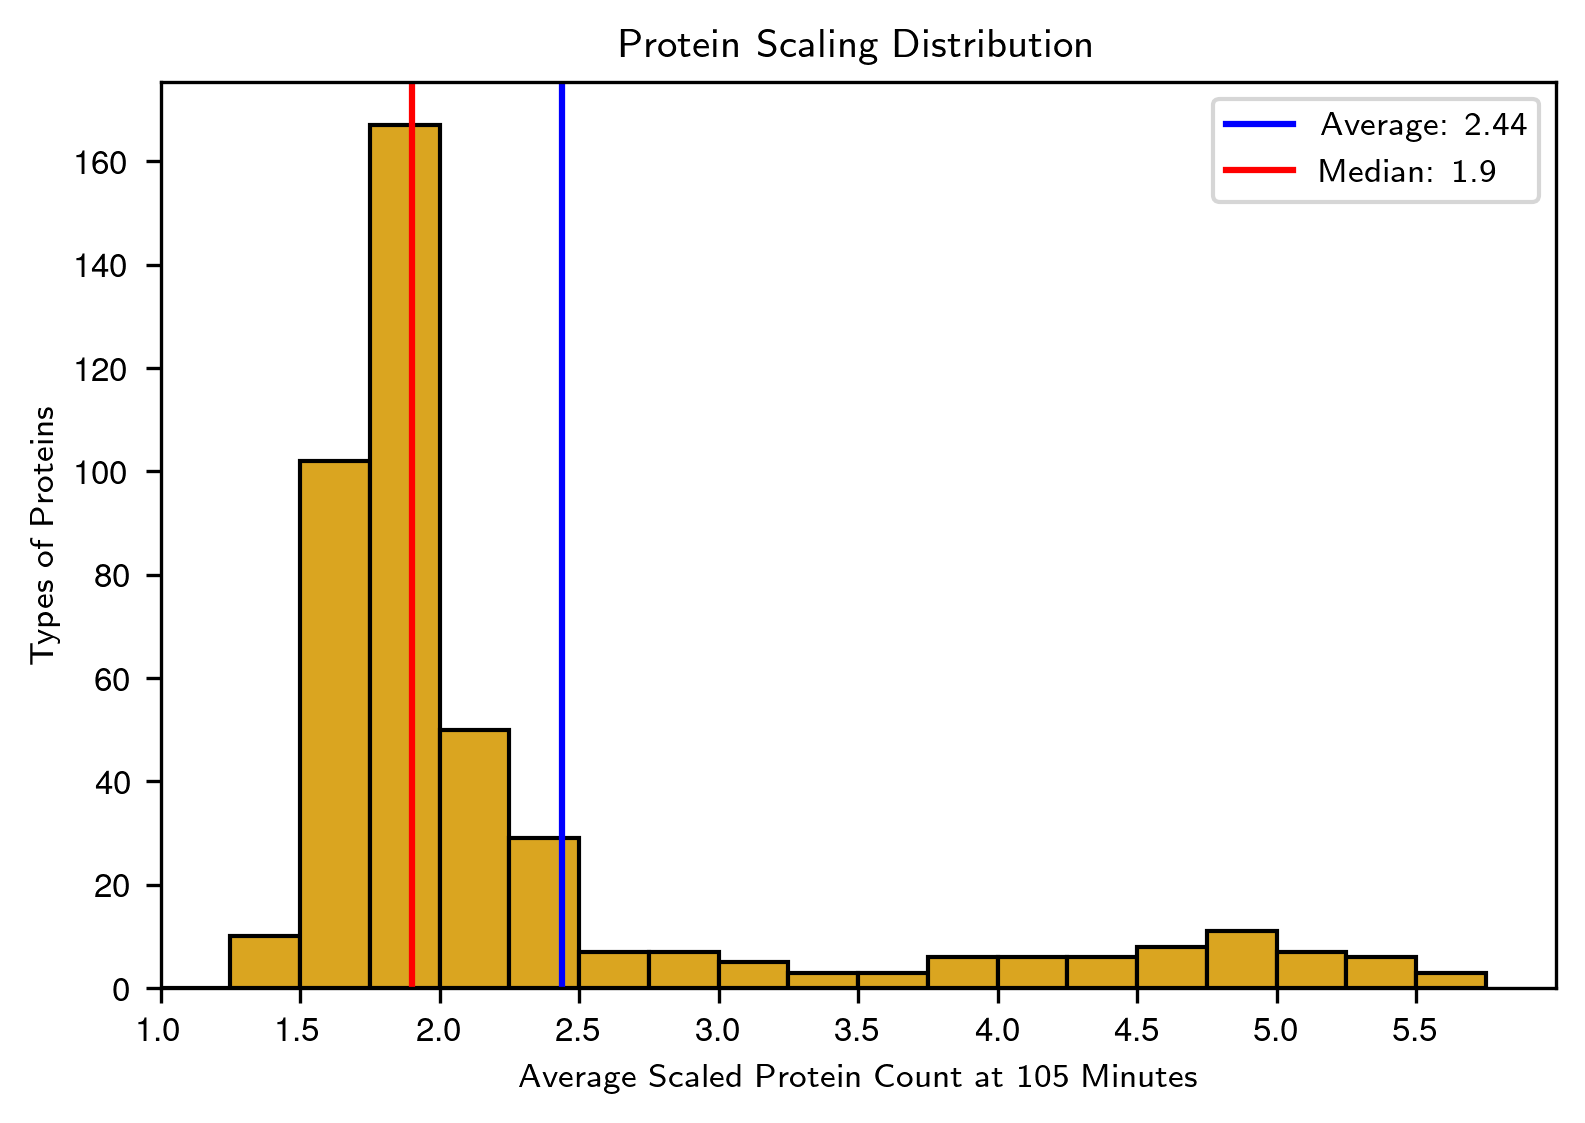

In [6]:
def calculate_protein_scaling_factor(w, protein_id, membrane_id, measurement_time_min=105):
    """
    Calculate protein scaling factor at a specific time point
    
    Parameters:
    - w: WCM_ensemble object
    - protein_id: protein species ID (e.g., 'P_0001')
    - membrane_id: membrane-bound protein species ID (e.g., 'PM_0001')
    - measurement_time_min: time point for measurement in minutes
    
    Returns:
    - scaling_factor: ratio of protein count at measurement time to initial count
    """
    # Get initial protein count
    initial_count = w.get_avg_species_traces([protein_id])[0][0]
    
    # Get membrane-bound protein count at measurement time
    membrane_count = w.get_avg_species_traces([membrane_id])[0][int(measurement_time_min * 60)]
    
    # Calculate scaling factor (total protein = initial + membrane-bound)
    total_at_time = membrane_count + initial_count
    scaling_factor = total_at_time / initial_count
    
    return scaling_factor

def analyze_protein_accumulation(w, genome, specList, measurement_time_min=105):
    """
    Analyze protein accumulation patterns for all proteins in the genome
    
    Parameters:
    - w: WCM_ensemble object
    - genome: genome dictionary containing protein information
    - specList: list of all species names
    - measurement_time_min: time point for measurement in minutes
    
    Returns:
    - all_scaling_factors: list of scaling factors for all proteins
    - extreme_proteins: dict containing proteins with extreme scaling factors
    """
    all_scaling_factors = []
    extreme_proteins = {'high': [], 'low': []}
    
    print("=== Analyzing Regular Proteins ===")
    for locus_tag, locus_dict in genome.items():
        if locus_dict['Type'] == 'protein':
            # Skip ribosomal proteins (handle separately)
            if 'S ribosomal' not in locus_dict['GeneName']:
                protein_id = 'P_' + locus_tag.split('_')[1]
                initial_count = w.get_avg_species_traces([protein_id])[0][0]
                
                # Only analyze proteins with initial count > 1
                if initial_count > 1:
                    membrane_id = 'PM_' + locus_tag.split('_')[1]
                    scaling_factor = calculate_protein_scaling_factor(
                        w, protein_id, membrane_id, measurement_time_min)
                    
                    # Collect proteins with extreme scaling factors
                    if scaling_factor > 2.5:
                        extreme_proteins['high'].append({
                            'locus': locus_tag,
                            'initial_count': initial_count,
                            'gene_name': locus_dict['GeneName'],
                            'rna_length': len(locus_dict['RNAsequence']),
                            'scaling_factor': round_sig(scaling_factor, 2)
                        })
                        print(f"HIGH: {locus_tag}, {initial_count}, {locus_dict['GeneName']}, "
                              f"{len(locus_dict['RNAsequence'])}, {round_sig(scaling_factor, 2)}")
                    
                    if scaling_factor < 1.5:
                        extreme_proteins['low'].append({
                            'locus': locus_tag,
                            'initial_count': initial_count,
                            'gene_name': locus_dict['GeneName'],
                            'rna_length': len(locus_dict['RNAsequence']),
                            'scaling_factor': round_sig(scaling_factor, 2)
                        })
                        print(f"LOW: {locus_tag}, {initial_count}, {locus_dict['GeneName']}, "
                              f"{len(locus_dict['RNAsequence'])}, {round_sig(scaling_factor, 2)}")
                    
                    all_scaling_factors.append(scaling_factor)
    
    print("\n=== Analyzing Ribosomal Proteins ===")
    for locus_tag, locus_dict in genome.items():
        if locus_dict['Type'] == 'protein' and 'S ribosomal' in locus_dict['GeneName']:
            protein_id = 'P_' + locus_tag.split('_')[1]
            initial_count = w.get_avg_species_traces([protein_id])[0][0]
            
            # Add baseline count for ribosomal proteins
            adjusted_initial = initial_count + 500
            
            membrane_id = 'PM_' + locus_tag.split('_')[1]
            membrane_count = w.get_avg_species_traces([membrane_id])[0][int(measurement_time_min * 60)]
            
            total_at_time = membrane_count + adjusted_initial
            scaling_factor = total_at_time / adjusted_initial
            
            # Collect ribosomal proteins with extreme scaling factors
            if scaling_factor > 2.5:
                extreme_proteins['high'].append({
                    'locus': locus_tag,
                    'initial_count': initial_count,
                    'gene_name': locus_dict['GeneName'],
                    'rna_length': len(locus_dict['RNAsequence']),
                    'scaling_factor': round_sig(scaling_factor, 2),
                    'type': 'ribosomal'
                })
                print(f"RIBO HIGH: {locus_tag}, {initial_count}, {locus_dict['GeneName']}, "
                      f"{len(locus_dict['RNAsequence'])}, {round_sig(scaling_factor, 2)}")
            
            if scaling_factor < 1.5:
                extreme_proteins['low'].append({
                    'locus': locus_tag,
                    'initial_count': initial_count,
                    'gene_name': locus_dict['GeneName'],
                    'rna_length': len(locus_dict['RNAsequence']),
                    'scaling_factor': round_sig(scaling_factor, 2),
                    'type': 'ribosomal'
                })
                print(f"RIBO LOW: {locus_tag}, {initial_count}, {locus_dict['GeneName']}, "
                      f"{len(locus_dict['RNAsequence'])}, {round_sig(scaling_factor, 2)}")
            
            all_scaling_factors.append(scaling_factor)
    
    return all_scaling_factors, extreme_proteins

def plot_protein_scaling_distribution(scaling_factors, bins=None, title_prefix=""):
    """
    Plot histogram of protein scaling factors
    
    Parameters:
    - scaling_factors: list of scaling factors
    - bins: bin edges for histogram
    - title_prefix: prefix for plot title
    """
    if bins is None:
        bins = [x * 0.25 for x in range(0, int(6 / 0.25))]
    
    # Create histogram
    plt.hist(scaling_factors, color='goldenrod', edgecolor='k', bins=bins, linewidth=1)
    
    # Calculate and display statistics
    avg_scaling = np.average(np.array(scaling_factors))
    median_scaling = np.median(np.array(scaling_factors))
    
    plt.axvline(avg_scaling, color='blue', label=f"Average: {round_sig(avg_scaling, 3)}")
    plt.axvline(median_scaling, color='red', label=f"Median: {round_sig(median_scaling, 3)}")
    
    # Format plot
    plt.xlim(1, 6)
    plt.xticks(np.arange(1, 6, step=0.5))
    plt.xlabel('Average Scaled Protein Count at 105 Minutes')
    plt.ylabel('Types of Proteins')
    plt.title(f'{title_prefix}Protein Scaling Distribution')
    plt.legend()
    
    return avg_scaling, median_scaling

# === Main Analysis ===
print("Starting protein accumulation analysis...")

# Analyze all proteins
all_scaling_factors, extreme_proteins = analyze_protein_accumulation(w, genome, specList)

# Create histogram
bins = [x * 0.25 for x in range(0, int(6 / 0.25))]
avg_scaling, median_scaling = plot_protein_scaling_distribution(all_scaling_factors, bins)

# Store results in original variable names for compatibility
all_ptns_dist = all_scaling_factors
avg_ptns = avg_scaling
median_ptns = median_scaling

print(f"\n=== Summary Statistics ===")
print(f"Total proteins analyzed: {len(all_scaling_factors)}")
print(f"Average scaling factor: {round_sig(avg_scaling, 3)}")
print(f"Median scaling factor: {round_sig(median_scaling, 3)}")
print(f"High scaling proteins (>2.5x): {len(extreme_proteins['high'])}")
print(f"Low scaling proteins (<1.5x): {len(extreme_proteins['low'])}")

## 4. Whole-Cell Energetics: ATP Production and Expenditure

=== Collecting ATP Cost Data ===
=== ATP Analysis Complete ===
Total ATP cost categories analyzed: 13
Results stored in original variable names for compatibility


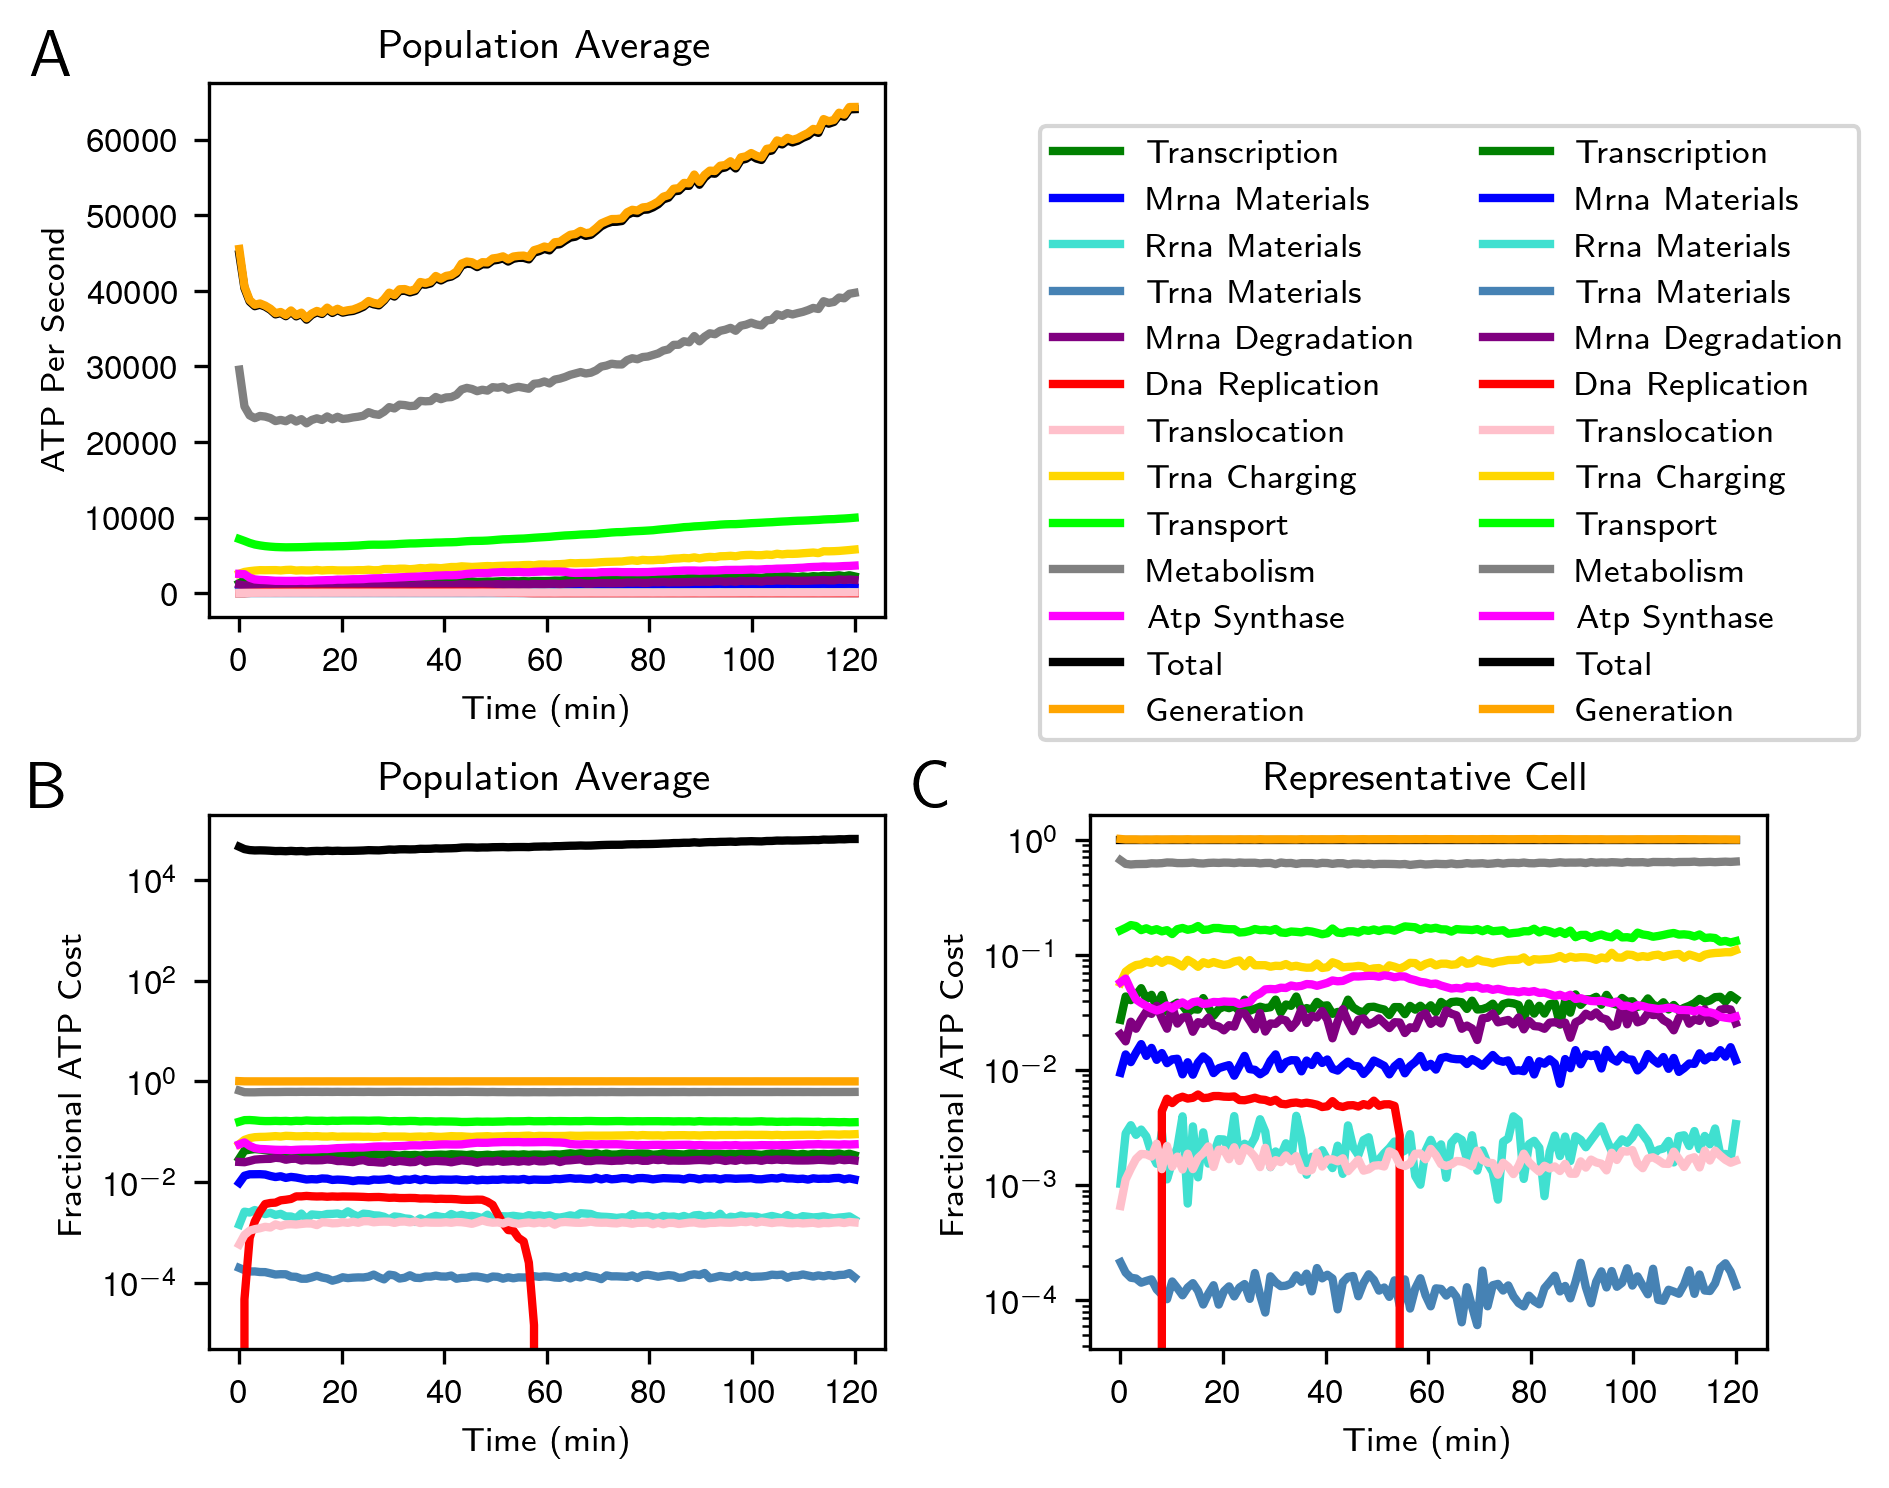

In [7]:
def get_atp_cost_data(w, cost_species_list):
    """
    Get ATP cost data for a list of species
    
    Parameters:
    - w: WCM_ensemble object
    - cost_species_list: list of species names for ATP costs
    
    Returns:
    - cost_data: ATP cost data array
    """
    cost_traces = w.get_species_traces(cost_species_list)
    return cost_traces[0].T

def calculate_amino_acid_charging_costs(w, amino_acid_list):
    """
    Calculate total ATP costs for amino acid charging
    
    Parameters:
    - w: WCM_ensemble object
    - amino_acid_list: list of amino acid abbreviations
    
    Returns:
    - total_charging_costs: summed ATP costs for all amino acids
    """
    charging_cost_ids = [aa + '_cost_second' for aa in amino_acid_list]
    total_costs = None
    
    for cost_id in charging_cost_ids:
        aa_cost = w.get_species_traces([cost_id])
        if total_costs is None:
            total_costs = aa_cost[0].T
        else:
            total_costs = total_costs + aa_cost[0].T
    
    return total_costs

def calculate_transport_costs(w, transport_reaction_ids):
    """
    Calculate total ATP costs for transport reactions
    
    Parameters:
    - w: WCM_ensemble object
    - transport_reaction_ids: list of transport reaction IDs
    
    Returns:
    - total_transport_costs: summed ATP costs for all transport reactions
    """
    total_costs = None
    
    for rxn_id in transport_reaction_ids:
        rxn_costs = getAvgRxnTraceCounts(rxn_id, w)
        if total_costs is None:
            total_costs = rxn_costs
        else:
            total_costs = total_costs + rxn_costs
    
    return total_costs

def calculate_metabolic_costs(w, metabolic_reaction_ids):
    """
    Calculate total ATP costs for metabolic reactions
    
    Parameters:
    - w: WCM_ensemble object
    - metabolic_reaction_ids: list of metabolic reaction IDs
    
    Returns:
    - total_metabolic_costs: summed ATP costs for all metabolic reactions
    """
    total_costs = None
    
    for rxn_id in metabolic_reaction_ids:
        rxn_costs = getAvgRxnTraceCounts(rxn_id, w)
        if total_costs is None:
            total_costs = rxn_costs
        else:
            total_costs = total_costs + rxn_costs
    
    return total_costs

def calculate_atp_generation(w, generation_reaction_ids):
    """
    Calculate total ATP generation from specified reactions
    
    Parameters:
    - w: WCM_ensemble object
    - generation_reaction_ids: list of ATP generation reaction IDs
    
    Returns:
    - total_generation: summed ATP generation from all reactions
    """
    total_generation = None
    
    for rxn_id in generation_reaction_ids:
        rxn_generation = getAvgRxnTraceCounts(rxn_id, w)
        if total_generation is None:
            total_generation = rxn_generation
        else:
            total_generation = total_generation + rxn_generation
    
    return total_generation

def setup_atp_plotting_colors():
    """Define consistent colors for ATP cost categories"""
    return {
        'transcription': 'green',
        'mrna_materials': 'blue',
        'rrna_materials': 'turquoise',
        'trna_materials': 'steelblue',
        'mrna_degradation': 'purple',
        'dna_replication': 'red',
        'metabolism': 'grey',
        'transport': 'lime',
        'translocation': 'pink',
        'atp_synthase': 'fuchsia',
        'trna_charging': 'gold',
        'total': 'k',
        'generation': 'orange'
    }

def plot_atp_costs(ax, time_minutes, cost_data_dict, colors, endpoint, plot_type='absolute'):
    """
    Plot ATP costs over time
    
    Parameters:
    - ax: matplotlib axis object
    - time_minutes: time array in minutes
    - cost_data_dict: dictionary of cost data for each category
    - colors: color mapping for each category
    - endpoint: endpoint for data (in seconds)
    - plot_type: 'absolute' or 'fractional'
    """
    for category, data in cost_data_dict.items():
        if plot_type == 'fractional' and category != 'total':
            # Plot fractional costs
            plot_data = np.average(data[:, :endpoint], axis=0).reshape(-1, 60).mean(axis=1)
            total_data = np.average(cost_data_dict['total'][:, :endpoint], axis=0).reshape(-1, 60).mean(axis=1)
            plot_data = plot_data / total_data
        else:
            # Plot absolute costs
            plot_data = np.average(data[:, :endpoint], axis=0).reshape(-1, 60).mean(axis=1)
        
        ax.plot(time_minutes, plot_data, color=colors[category], lw=2, label=category.replace('_', ' ').title())

def plot_single_replicate_atp_costs(ax, time_minutes, cost_data_dict, colors, endpoint, rep_id=5):
    """
    Plot ATP costs for a single replicate
    
    Parameters:
    - ax: matplotlib axis object
    - time_minutes: time array in minutes
    - cost_data_dict: dictionary of cost data for each category
    - colors: color mapping for each category
    - endpoint: endpoint for data (in seconds)
    - rep_id: replicate ID to plot
    """
    for category, data in cost_data_dict.items():
        if category != 'total':
            # Plot fractional costs for single replicate
            plot_data = data[rep_id, :endpoint].reshape(-1, 60).mean(axis=1)
            total_data = cost_data_dict['total'][rep_id, :endpoint].reshape(-1, 60).mean(axis=1)
            plot_data = plot_data / total_data
        else:
            plot_data = data[rep_id, :endpoint].reshape(-1, 60).mean(axis=1) / data[rep_id, :endpoint].reshape(-1, 60).mean(axis=1)
        
        ax.plot(time_minutes, plot_data, color=colors[category], lw=2)

# === Setup Figure and Parameters ===
fig, axs = plt.subplots(2, 2, figsize=(6, 5))
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.dpi'] = 300

# Time and analysis parameters
time_minutes = np.linspace(0, 120, 120)
endpoint = 7200  # 2 hours in seconds

# === Collect ATP Cost Data ===
print("=== Collecting ATP Cost Data ===")

# Direct ATP costs from species traces
atp_costs = {
    'transcription': get_atp_cost_data(w, ['ATP_trsc_cost_second']),
    'mrna_materials': get_atp_cost_data(w, ['ATP_mRNA_cost_second']),
    'rrna_materials': get_atp_cost_data(w, ['ATP_rRNA_cost_second']),
    'trna_materials': get_atp_cost_data(w, ['ATP_tRNA_cost_second']),
    'mrna_degradation': get_atp_cost_data(w, ['ATP_mRNAdeg_cost_second']),
    'dna_replication': get_atp_cost_data(w, ['ATP_DNArep_cost_second']),
    'translocation': get_atp_cost_data(w, ['ATP_transloc_cost_second'])
}

# Calculate amino acid charging costs
amino_acids = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY',
               'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 
               'THR', 'TRP', 'TYR', 'VAL', 'FMET']
atp_costs['trna_charging'] = calculate_amino_acid_charging_costs(w, amino_acids)

# Calculate transport costs
transport_rxns = ['RIBFLVabc', 'P5Pabc', '5FTHFabc', 'NACabc', 'COAabc', 'THMPPabc', 'SPRMabc',
                  'DCYTabc', 'URIabc', 'THMDabc', 'ADNabc', 'DADNabc', 'GSNabc', 'DGSNabc',
                  'Kt6', 'MG2abc', 'CA2abc', 'PIabc', 'ARGabc', 'ASPabc', 'GLUabc', 'GLYabc',
                  'ILEabc', 'ALAabc', 'ASNabc', 'LEUabc', 'GLNabc', 'HISabc', 'LYSabc', 'PROabc',
                  'PHEabc', 'THRabc', 'TRPabc', 'TYRabc', 'VALabc', 'SERabc', 'METabc']
atp_costs['transport'] = calculate_transport_costs(w, transport_rxns)

# Calculate metabolic costs
metabolic_rxns = ['PFK', 'PRPPS', 'ADK1', 'DADK', 'GK1', 'DGK1', 'UMPK', 'CYTK1', 'CYTK2',
                  'TMDK1', 'TMPK', 'NNATr', 'NADS', 'NADK', 'RBFK', 'FMNAT', '5FTHFPGS',
                  'FTHFCL', 'FAKr', 'GLYK']
atp_costs['metabolism'] = calculate_metabolic_costs(w, metabolic_rxns)

# Calculate ATP synthase costs (negative)
atp_costs['atp_synthase'] = -1 * getAvgRxnTraceCounts('ATPase', w)

# Calculate total ATP costs
atp_costs['total'] = (atp_costs['transcription'] + atp_costs['mrna_materials'] + 
                     atp_costs['rrna_materials'] + atp_costs['trna_materials'] +
                     atp_costs['mrna_degradation'] + atp_costs['dna_replication'] +
                     atp_costs['translocation'] + atp_costs['trna_charging'] +
                     atp_costs['transport'] + atp_costs['metabolism'] + atp_costs['atp_synthase'])

# Calculate ATP generation
generation_rxns = ['PYK', 'PGK', 'ACKr']
atp_costs['generation'] = calculate_atp_generation(w, generation_rxns)

# === Setup Colors ===
colors = setup_atp_plotting_colors()

# === Plot 1: Population Average - Absolute Costs ===
plot_atp_costs(axs[0,0], time_minutes, atp_costs, colors, endpoint, 'absolute')
axs[0,0].set_ylabel('ATP Per Second')
axs[0,0].set_xlabel('Time (min)')
axs[0,0].set_xticks([x*20 for x in range(7)])
axs[0,0].set_title('Population Average')
axs[0,0].text(-0.2, 1.1, 'A', transform=axs[0,0].transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

# === Plot 2: Population Average - Fractional Costs ===
plot_atp_costs(axs[1,0], time_minutes, atp_costs, colors, endpoint, 'fractional')
axs[1,0].set_ylabel('Fractional ATP Cost')
axs[1,0].set_xlabel('Time (min)')
axs[1,0].set_title('Population Average')
axs[1,0].set_xticks([x*20 for x in range(7)])
axs[1,0].set_yscale('log')
axs[1,0].text(-0.2, 1.1, 'B', transform=axs[1,0].transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

# === Plot 3: Single Replicate - Fractional Costs ===
plot_single_replicate_atp_costs(axs[1,1], time_minutes, atp_costs, colors, endpoint, rep_id=5)
axs[1,1].set_ylabel('Fractional ATP Cost')
axs[1,1].set_xlabel('Time (min)')
axs[1,1].set_title('Representative Cell')
axs[1,1].set_xticks([x*20 for x in range(7)])
axs[1,1].set_yscale('log')
axs[1,1].text(-0.2, 1.1, 'C', transform=axs[1,1].transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

# === Add Legend ===
leg = fig.legend(ncol=2)
bb = leg.get_bbox_to_anchor().transformed(axs[0,0].transAxes.inverted())
bb.x0 = bb.x0
bb.x1 = bb.x1 - 0.02
bb.y1 = bb.y1 - 0.4
leg.set_bbox_to_anchor(bb, transform=axs[0,0].transAxes)

# === Hide Unused Subplot ===
fig.delaxes(axs[0,1])

plt.tight_layout()
plt.savefig(f'{figDir}atp_costs.png')

# === Store Results in Original Variable Names for Compatibility ===
atpTrsc = atp_costs['transcription']
atpMrna = atp_costs['mrna_materials']
atpRrna = atp_costs['rrna_materials']
atpTrna = atp_costs['trna_materials']
atpMrnadeg = atp_costs['mrna_degradation']
atpDnarep = atp_costs['dna_replication']
atpTransloc = atp_costs['translocation']
atpCharging = atp_costs['trna_charging']
atpTransport = atp_costs['transport']
atpMetabolism = atp_costs['metabolism']
atpAtpase = atp_costs['atp_synthase']
atpTotal = atp_costs['total']
atpGeneration = atp_costs['generation']

print("=== ATP Analysis Complete ===")
print(f"Total ATP cost categories analyzed: {len(atp_costs)}")
print("Results stored in original variable names for compatibility")